In [1]:
import numpy as np
import random as rng
from functools import partial
from time import time
import copy
from funs import *

In [2]:
w = 3
k = 10
alfa = 0.5

In [3]:
Theta = np.array([[0.375, 0.1, 0.14285714285714285],
                  [0.125, 0.2, 0.2857142857142857],
                  [0.25, 0.3, 0.14285714285714285],
                  [0.25, 0.4, 0.42857142857142855]],)
ThetaB = np.array([0.25, 0.25, 0.25, 0.25])

In [4]:
rng.seed(1)
Theta = np.zeros((4,w))
Theta[:3, :] = np.random.random((3,w)) / w
Theta[3, :] = 1 - np.sum(Theta, axis=0)
ThetaB = np.zeros(4)
ThetaB[:3] = np.random.random(3) / w
ThetaB[3] = 1 - np.sum(ThetaB, axis=0)

In [5]:
rng.seed(1)
res = np.zeros((k, w))
for i in np.arange(0, k):
    z = np.random.choice(np.arange(0, 2), p=[1 - alfa, alfa])
    if z == 0:
        res[i, :] = np.random.choice(np.arange(1, 5), p=ThetaB, size=w)
    if z == 1:
        for j in np.arange(0, w):
            res[i, j] = np.random.choice(np.arange(1, 5), p=Theta[:, j])

In [152]:
w = 3
k = 1000
alfa = 0.5
Theta = np.array([[0.375, 0.1, 0.14285714285714285],
                  [0.125, 0.2, 0.2857142857142857],
                  [0.25, 0.3, 0.14285714285714285],
                  [0.25, 0.4, 0.42857142857142855]], )
ThetaB = np.array([0.25, 0.25, 0.25, 0.25])


In [97]:
def generate_data(Theta, ThetaB, alfa, k, seed: int = 1):
    w = Theta.shape[1]
    rng.seed(seed)
    res = np.zeros((k, w))
    for i in np.arange(0, k):
        z = np.random.choice(np.arange(0, 2), p=[1 - alfa, alfa])
        if z == 0:
            res[i, :] = np.random.choice(np.arange(1, 5), p=ThetaB, size=w)
        if z == 1:
            for j in np.arange(0, w):
                res[i, j] = np.random.choice(np.arange(1, 5), p=Theta[:, j])

    return np.array(res, dtype='int32')

In [154]:
X = generate_data(Theta, ThetaB, alfa, k, seed=2022)

In [30]:
thetaB = np.full((4, ), 1 / 4)
theta = np.full((4, w), 1) / 4

In [35]:
pi = np.full((k, ), 1, dtype='float32')
for i in np.arange(k):
    ix = X[i,:] - 1
    mask = (ix[:, None] == np.arange(theta.shape[0])).T
    prod_theta = np.prod(theta[mask])
    prod_thetaB = np.prod(np.take(thetaB, ix))
    pi[i] = (alfa * prod_theta) / (alfa * prod_theta + (1 - alfa) * prod_thetaB)

In [98]:
for m in np.arange(4):
    for l in np.arange(w):
        theta[m, l] = np.sum(np.array((X[:, l] == m + 1), dtype='float32') * pi) / np.sum(pi)

In [107]:
for m in np.arange(4):
    sum_theta = 0
    sum_pi = w * np.sum(1 - pi)
    for j in np.arange(k):
        sum_theta = sum_theta + (1 - pi[j]) * np.sum(X[j,:] == m + 1)
    thetaB[m] = sum_theta / sum_pi

In [186]:
thetaB = np.random.random(4) / 4
thetaB[0] = 1 - np.sum(thetaB[1:])
theta = np.random.random(4*w) / (4*w)
theta.shape = (4, w)
theta[0,:] = 1 - theta[1:,:].sum(axis=0)
for rep in np.arange(200):
    pi = np.full((k, ), 1, dtype='float32')
    for i in np.arange(k):
        ix = X[i,:] - 1
        mask = (ix[:, None] == np.arange(theta.shape[0])).T
        prod_theta = np.prod(theta[mask])
        prod_thetaB = np.prod(np.take(thetaB, ix))
        pi[i] = (alfa * prod_theta) / (alfa * prod_theta + (1 - alfa) * prod_thetaB)
    for m in np.arange(4):
        for l in np.arange(w):
            theta[m, l] = np.sum(np.array((X[:, l] == m + 1), dtype='float32') * pi) / np.sum(pi)
    for m in np.arange(4):
        sum_theta = 0
        sum_pi = w * np.sum(1 - pi)
        for j in np.arange(k):
            sum_theta = sum_theta + (1 - pi[j]) * np.sum(X[j, :] == m + 1)
        thetaB[m] = sum_theta / sum_pi


In [187]:
(3/2 * calc_dtv(theta, Theta) + calc_dtv(thetaB, ThetaB)) * 1/4

0.0950566780708214

In [158]:
calc_dtv(thetaB, ThetaB)

0.05777039091024648

In [76]:
thetaB = np.full((4,), 1 / 4)
theta = np.full((4, w), 1) / 4

i=1
pi = np.full((k, ), 1, dtype='float32')
ix = X[i,:] - 1
mask = (ix[:, None] == np.arange(theta.shape[0])).T
prod_theta = np.prod(theta[mask])
prod_thetaB = np.prod(np.take(thetaB, ix))
pi[i] = (alfa * prod_theta) / (alfa * prod_theta + (1 - alfa) * prod_thetaB)

X[i,:]
mask

array([[ True, False, False],
       [False, False, False],
       [False, False, False],
       [False,  True,  True]])

In [81]:
X[i,:]

array([1, 4, 4])

In [58]:
calc_dtv(thetaB, ThetaB)

0.05780763073851396

In [5]:
res = run_em(X, alpha=0.5)

TypeError: Cannot cast array data from dtype('float64') to dtype('int64') according to the rule 'safe'

In [47]:
tic1 = time()
thetaB = np.full((4,), 1 / 4)
theta = np.full((4, w), 1) / 4
for rep in np.arange(500):
    pi = np.full((k, ), 1, dtype='float32')
    for i in np.arange(k):
        ix = X[i,:] - 1
        mask = (ix[:, None] == np.arange(theta.shape[0])).T
        prod_theta = np.prod(theta[mask])
        prod_thetaB = np.prod(np.take(thetaB, ix))
        pi[i] = (alfa * prod_theta) / (alfa * prod_theta + (1 - alfa) * prod_thetaB)
    for m in np.arange(4):
        # Derivative for Theta
        numerator = (np.array((X == m + 1), dtype='float32').T * pi).T
        theta[m, :] = np.apply_along_axis(np.sum, axis=0, arr=numerator) / np.sum(pi)
        # Derivative for ThetaB
        Al = np.apply_along_axis(np.sum, axis=1, arr=(X == m + 1))
        thetaB[m] = (np.sum((1 - pi) * Al)) / (w * np.sum(1 - pi))
toc1 = time()

In [41]:
print(toc1 - tic1)

21.003689765930176


In [71]:
def calc_pii(vec, theta, thetaB, alpha: float) -> np.ndarray:
    ix = vec - 1
    mask = (ix[:, None] == np.arange(4)).T
    prod_theta = np.prod(theta[mask])
    prod_thetaB = np.prod(np.take(thetaB, ix))
    res = (alpha * prod_theta) / (alpha * prod_theta + (1 - alpha) * prod_thetaB)
    return res

In [10]:
max_iter = 1000
a = np.zeros((max_iter, ))
b = np.zeros((max_iter, ))

In [12]:
X = np.array(X, dtype='int64')
w = X.shape[1]
tic = time()
thetaB = np.full((4,), 1 / 4)
theta = np.full((4, w), 1) / 4
rep = 0
theta_next = copy.deepcopy(theta)
thetaB_next = copy.deepcopy(thetaB)
while rep < max_iter:
    # Calculating pi
    calc_pi_mapfunc = partial(calc_pii, theta=theta, thetaB=thetaB, alpha=alfa)
    pi = np.array(list(map(calc_pi_mapfunc, X)))
    for m in np.arange(4):
        # Derivative for Theta
        numerator = (np.array((X == m + 1), dtype='float32').T * pi).T
        theta_next[m, :] = np.apply_along_axis(np.sum, axis=0, arr=numerator) / np.sum(pi)
        # Derivative for ThetaB
        Al = np.apply_along_axis(np.sum, axis=1, arr=(X == m + 1))
        thetaB_next[m] = (np.sum((1 - pi) * Al)) / (w * np.sum(1 - pi))
    diff = theta_next - theta
    norm = ((diff ** 2).sum()) / 4 * w
    diffB = thetaB_next - thetaB
    normB = ((diffB ** 2).sum()) / 4
    theta = copy.deepcopy(theta_next)
    thetaB = copy.deepcopy(thetaB_next)
    a[rep] = norm
    b[rep] = normB
    rep += 1
toc = time()

In [15]:
thetaB

array([0.14857816, 0.20859138, 0.28102925, 0.3618012 ])

In [121]:
import matplotlib.pyplot as plt

In [122]:
xpoints = np.arange(max_iter)

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

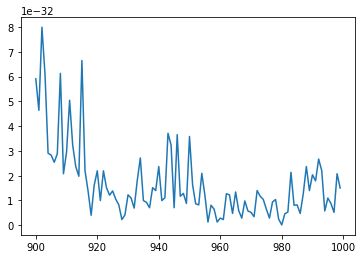

In [135]:
plt.plot(xpoints[900:], a[900:])
plt.show()